In [47]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [134]:
df=pd.read_csv("train.csv");
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [135]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


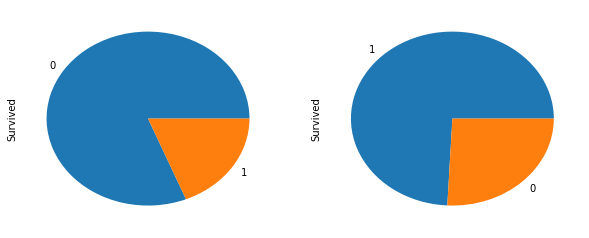

In [137]:
#### Check if the gender plays a role in survival
fig = plt.figure(figsize=(10,4))
fig.add_subplot(121)
df.Survived[df['Sex'] == 'male'].value_counts().plot(kind='pie')
fig.add_subplot(122)
df.Survived[df['Sex'] == 'female'].value_counts().plot(kind='pie')

In [138]:
#### Split the titles from the passenger names which is itself a feature but also help in calculating missing median age values
df['Name'] = df['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
titles = df['Name'].unique()
titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [139]:
df['Age'].fillna(-1, inplace=True)

medians = dict()
for title in titles:
    median = df.Age[(df["Age"] != -1) & (df['Name'] == title)].median()
    medians[title] = median
for index, row in df.iterrows():
    if row['Age'] == -1:
        df.loc[index, 'Age'] = medians[row['Name']]

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S


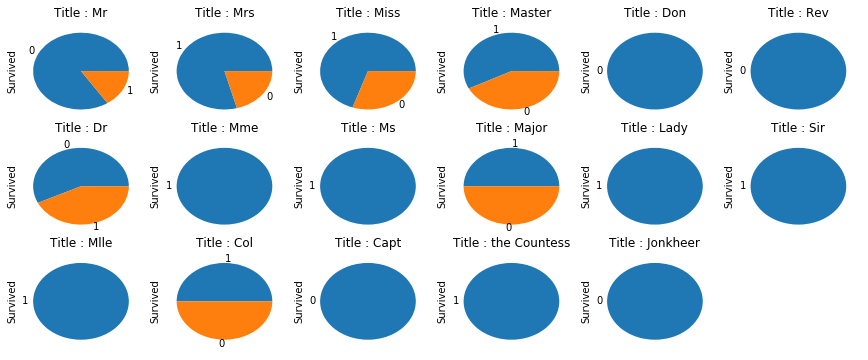

In [140]:
fig = plt.figure(figsize=(15,6))

i=1
for title in df['Name'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('Title : {}'.format(title))
    df.Survived[df['Name'] == title].value_counts().plot(kind='pie')
    i += 1

In [151]:
print(df['Name'][2])

Miss


In [152]:
replacement = {
    'Don': 0,
    'Rev': 0,
    'Jonkheer': 0,
    'Capt': 0,
    'Mr': 1,
    'Dr': 2,
    'Col': 3,
    'Major': 3,
    'Master': 4,
    'Miss': 5,
    'Mrs': 6,
    'Mme': 7,
    'Ms': 7,
    'Mlle': 7,
    'Sir': 7,
    'Lady': 7,
    'the Countess': 7
}
#df['Name'] = df['Name'].replace(lambda x : replacement.get(x))

for jef in range(0,len(df['Name'])):
    df['Name'][jef]=replacement[df['Name'][jef]]
    
#for key in replacement:
#    print (key, 'corresponds to', replacement[key])
df.head()

1


C:\Users\AnandNoctis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,6,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,5,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,6,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,1,male,35.0,0,0,373450,8.0500,NaN,S


In [154]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,0,male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,5,female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,5,female,21.0,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,1,male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,1,male,32.0,0,0,370376,7.75,NaN,Q


In [155]:
from sklearn.preprocessing import StandardScaler
df['Name'] = StandardScaler().fit_transform(df['Name'].values.reshape(-1, 1))
df['Age'] = StandardScaler().fit_transform(df['Age'].values.reshape(-1, 1))

C:\Users\AnandNoctis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [156]:
df['Fare'].fillna(-1, inplace=True)
medians = dict()
for pclass in df['Pclass'].unique():
    median = df.Fare[(df["Fare"] != -1) & (df['Pclass'] == pclass)].median()
    medians[pclass] = median
for index, row in df.iterrows():
    if row['Fare'] == -1:
        df.loc[index, 'Fare'] = medians[row['Pclass']]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,-0.797294,male,-0.557420,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1.537975,female,0.649410,1,0,PC 17599,71.2833,C85,C
2,3,1,3,1.070922,female,-0.255712,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1.537975,female,0.423129,1,0,113803,53.1000,C123,S
4,5,0,3,-0.797294,male,0.423129,0,0,373450,8.0500,NaN,S


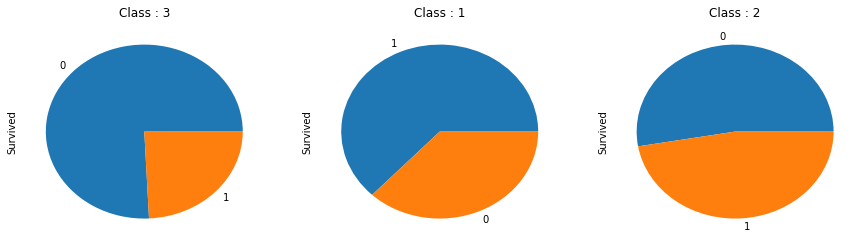

In [157]:
fig = plt.figure(figsize=(15,4))

i=1
for pclass in df['Pclass'].unique():
    fig.add_subplot(1, 3, i)
    plt.title('Class : {}'.format(pclass))
    df.Survived[df['Pclass'] == pclass].value_counts().plot(kind='pie')
    i += 1

In [158]:
df['Pclass'] = StandardScaler().fit_transform(df['Pclass'].values.reshape(-1, 1))

C:\Users\AnandNoctis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


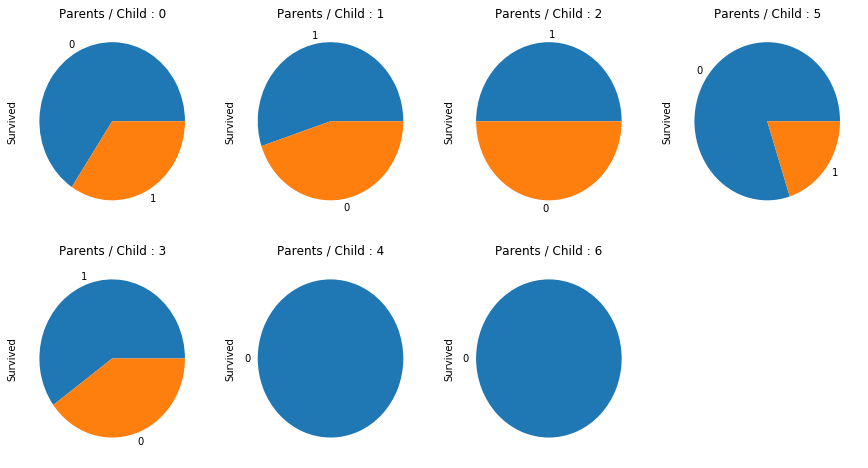

In [159]:
fig = plt.figure(figsize=(15,8))
i = 0
for parch in df['Parch'].unique():
    fig.add_subplot(2, 4, i+1)
    plt.title('Parents / Child : {}'.format(parch))
    df.Survived[df['Parch'] == parch].value_counts().plot(kind='pie')
    i += 1

In [160]:
replacement = {
    6: 0,
    4: 0,
    5: 1,
    0: 2,
    2: 3,
    1: 4,
    3: 5
}
df['Parch'] = df['Parch'].apply(lambda x: replacement.get(x))
df['Parch'] = StandardScaler().fit_transform(df['Parch'].values.reshape(-1, 1))

C:\Users\AnandNoctis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [161]:
df.drop('Ticket', axis=1, inplace=True)

In [162]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,0.827377,-0.797294,male,-0.557420,1,-0.468807,7.2500,NaN,S
1,2,1,-1.566107,1.537975,female,0.649410,1,-0.468807,71.2833,C85,C
2,3,1,0.827377,1.070922,female,-0.255712,0,-0.468807,7.9250,NaN,S
3,4,1,-1.566107,1.537975,female,0.423129,1,-0.468807,53.1000,C123,S
4,5,0,0.827377,-0.797294,male,0.423129,0,-0.468807,8.0500,NaN,S
